# Komplexe Zahlen für Wechselstrom

Um die Knotenregel und die Maschenregel für Wechselströme anwenden zu können, kann man entweder einfach alles im Zeitbereich lösen. Das ist in einem Jupyter Notebook auch ganz einfach und elegant möglich, da der Computer einem die mühsame Erstellung einer Wertetabelle und die Berechnung 
von Summen und so weiter automatisiert. 

Allerdings ist es trotzdem noch recht umständlich, wenn man so etwas nur mit dem Rechner berechnen kann. Außerdem braucht man bei Zeitfunktionen länger, um diese zu erfassen: Amplitude und Phase sind nicht auf einen Blick ersichtlich. Übersichtlicher ist die Zeigerdarstellung für komplexe Zahlen.

In [1]:
# Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
# Graphikparameter
plt.style.use('classic')
plt.rcParams.update({'font.size':24})
plt.rcParams.update({'figure.autolayout': True})

## Zeitfunktionen für Wechselspannungen

### Spannung $u_1(t)$ und Berechnung des Effektivwertes $U_1$

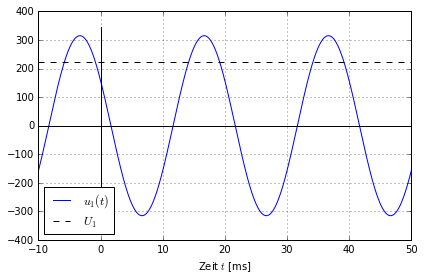

In [2]:
# Zeitvektor
t = np.linspace(-10e-3,50e-3,1000)
# Amplitude der Spannung
udach1 = 315 # in Volt
# Frequenz
f = 50 # in Hertz
# Kreisfrequenz
omega = 2*np.pi*f # in Hertz
# Nullphasenwinkel der Spannung
phiu1 = np.pi/3 # in rad
phiu1g = 180*phiu1/np.pi # in Grad
# Spannung
u1 = udach1*np.cos(omega*t+phiu1)
# Effektivwert
U1 = udach1/np.sqrt(2) # in Volt

# Diagramm erstellen
plt.plot(1000*t,u1,label='$u_1(t)$') # u1
plt.plot(1000*t,U1*np.ones(len(t)),'k--',label='$U_1$') # U1
plt.plot(np.zeros(2),[-1.1*udach1,1.1*udach1],'k-') # Hilfslinie
plt.plot([1000*t[0],1000*t[-1]],np.zeros(2),'k-') # Hilfslinie
plt.xlabel('Zeit $t$ [ms]') # x-Achsenbeschriftung
plt.grid() # Gitternetz
plt.legend(loc='best') # Legende

**Aufgabe: Verändern Sie den Wert der Phase `phiu1` und beobachten Sie, wie sich das Signal nach rechts oder nach links verschiebt. Was passiert, wenn `phiu1` negativ ist?**

*Antwort:*

### Spannung $u_2(t)$ und Berechnung des Effektivwertes $U_2$

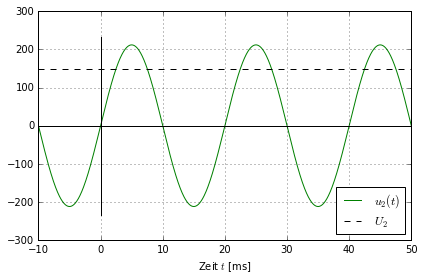

In [3]:
# Amplitude der zweiten Spannung
udach2 = np.sqrt(2)*150
# Nullphasenwinkel der zweiten Spannung
phiu2 = -np.pi/2 # in rad
phiu2g = 180*phiu2/np.pi # in Grad
# zweite Spannung
u2 = udach2*np.cos(omega*t+phiu2)
# Effektivwert
U2 = udach2/np.sqrt(2) # in Volt

# Diagramm erstellen
plt.plot(1000*t,u2,'g-',label='$u_2(t)$') # u2
plt.plot(1000*t,U2*np.ones(len(t)),'k--',label='$U_2$') # U2
plt.plot(np.zeros(2),[-1.1*udach2,1.1*udach2],'k-') # Hilfslinie
plt.plot([1000*t[0],1000*t[-1]],np.zeros(2),'k-') # Hilfslinie
plt.xlabel('Zeit $t$ [ms]') # x-Achsenbeschriftung
plt.grid()
plt.legend(loc='best') # Legende

**Aufgabe: Verändern Sie den Wert der Amplitude `udach2` des Signals und beobachten Sie den Effekt. Beachten Sie dabei, dass sich die y-Achsen-Skala an die benötigten Werte anpasst.**

*Antwort:*

### Summe $u_S(t)=u_1(t)+u_2(t)$ mit Effektivwert $U_S$

119.29984717074855


Text(0.5, 0, 'Zeit $t$ [ms]')

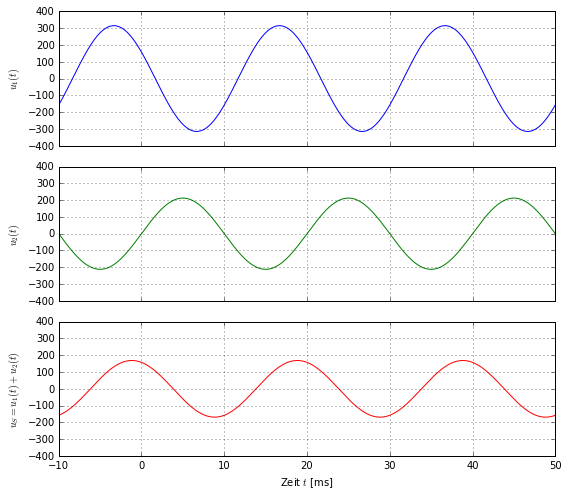

In [4]:
# Bestimmung des Signals us
us = u1 + u2
# Periode
T = 1/f
# Index Tidx des Zeitvektors t nach Verstreichen der Periode T
Tidx = (np.abs(t - T)).argmin()
# Effektivwert
US = np.sqrt(np.mean((us[0:Tidx])**2))
print(US)
# Amplitude
usdach = US*np.sqrt(2)

# Diagramm der Summe der beiden Spannungen:
# - wir machen 3 Diagramme untereinander
# - so kann man nachprüfen, ob die Summe stimmt
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(8, 7))
# oberes Diagramm: u1
ax[0].plot(1000*t,u1,'b-') # u1, python fängt immer bei 0 zu zählen an
ax[0].set_ylabel('$u_1(t)$') # y-Achsentitel, set_ylabel() statt ylabel()
ax[0].grid() # Gitternetzlinien
# mittleres Diagramm: u2
ax[1].plot(1000*t,u2,'g-') # u2
ax[1].set_ylabel('$u_2(t)$') # y-Achsentitel
ax[1].grid() # Gitternetzlinien
# unteres Diagramm: us = u1+u2
ax[2].plot(1000*t,us,'r-') # Summe
ax[2].set_ylabel(r'$u_S=u_1(t)+u_2(t)$') # y-Achsentitel
ax[2].grid() # Gitternetzlinien
ax[2].set_xlabel(r'Zeit $t$ [ms]') # x-Achsentitel nur unten

Es ergibt sich also eine neue Schwingung aus der Summe, deren Amplitude $\hat{u_S}$ python auch ausgeben kann und zwar mit der Formel, die im Skript beschrieben ist: 

\begin{equation}
\hat{u_S}=\sqrt{\hat{u_1}^2+\hat{u_2}^2+2\hat{u_1}\hat{u_2}\cos(\varphi_1-\varphi_2)}
\end{equation}

In [5]:
us = np.sqrt(udach1**2 + udach2**2 + 2*udach1*udach2*np.cos(phiu1-phiu2))
print('us = '+str(np.round(us,1))+' V')

us = 168.8 V


*Das ist die Amplitude, d.h. das müsste $\sqrt{2}\cdot U_S$ sein.*

**Aufgabe: Wir können testen, ob dieser Wert der gleiche ist wie das Maximum von $u_S(t)$. Verwenden Sie dafür in einer Code-Zelle den Befehl `print(np.max(us))` und kommentieren Sie in der Text-Zelle danach.**

In [6]:
# hier Ihren Code einfügen

*Kommentar*

**Aufgabe: Ändern Sie Amplitude und Phasenwinkel von $u_1(t)$ so ab, dass als Summe der beiden Signale $u_S(t)$ a) 0 bzw. b) das Doppelte von $u_2(t)$ herauskommt.**

*a) udach1 muss ... und phiu1 muss ... sein, damit $u_S(t)=0$*

*b) udach1 muss ... und phiu1 muss ... sein, damit $u_S(t)=2\cdot u_2(t)$*

## Zeigerdarstellung von Schwingungen

Wir hatten ja im Skript gesehen, dass eine Zeigerdarstellung sich in eine Cosinusdarstellung im Zeitbereich überführen lässt und umgekehrt. 

Eine ziemlich gute Animation davon, findet sich in geogebra: https://www.geogebra.org/m/m7RHfryq#material/FJtrEDAr

Sie können dort beobachten, wie sich jeweils die x-Auslenkung ($\cos$) und die y-Auslenkung ($\sin$) des Zeigers über der Zeit verhalten. Dabei ist in der Animation nur der Nullphasenwinkel $\varphi=0^\circ$ vorgesehen.

Was man allerdings beim längeren Beobachten der Animation feststellt, ist, dass das Zeiger sich nach jeweils einer Umdrehung wieder am gleichen Ort wie vorher befindet und dass er immer gleich schnell rotiert, weil ja die Frequenz konstant bleibt. 

Man könnte also einfach eine **Momentaufnahme** der Zeigerbewegung zu einem definierten Zeitpunkt machen und daraus entnehmen, welche Funktion zu sehen ist. Wir versuchen das nun für die oben definierten Spannungsfunktionen und stellen den Zeiger zum Zeitpunkt $t=0$ mit dem entsprechenden Nullphasenwinkel dar. Entsprechend der elektrotechnischen Konventionen hat er immer die **Länge des Effektivwertes**. 

Die x-Auslenkung des Zeigers nennt man **Realteil** oder in der Elektrotechnik auch **Wirkanteil**. Die y-Ausrichtung des Zeigers heißt **Imaginärteil** oder in der Elektrotechnik auch **Blindanteil**. Genauso wie in der oben verlinkten geogebra-App gezeigt, können wir diese Anteile ausrechnen: 

In [7]:
# Wirkanteile der Spannungen u1 und u2
UW1 = U1*np.cos(phiu1)
UW2 = U2*np.cos(phiu2)
# Blindanteile der Spannungen u1 und u2
UB1 = U1*np.sin(phiu1)
UB2 = U2*np.sin(phiu2)

Nun stellen wir die Spannungen $\underline{U_1}=U_{1,W}+jU_{1,B}$ und $\underline{U_2}=U_{2,W}+jU{1,B}$ als Zeiger dar und berechnen daraus die Zeigerdarstellung für die Summe der beiden Spannung, indem wir die beiden Zeiger addieren.

In [8]:
# Summenzeiger US
UWS = UW1 + UW2
UBS = UB1 + UB2

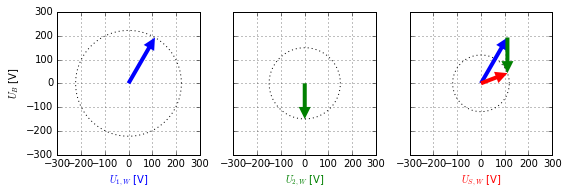

In [9]:
# für den Hilfskreis benötigte Variablen, jeweils für jede Spannung
theta = np.linspace(0, 2*np.pi, 1000) # einmal alle Winkel im Kreis
# für U1
uh1x = U1*np.cos(theta) # x-Komponenten aller Punkte im Kreis
uh1y = U1*np.sin(theta) # y-Komponenten aller Punkte im Kreis
# für U2
uh2x = U2*np.cos(theta) # x-Komponenten aller Punkte im Kreis
uh2y = U2*np.sin(theta) # y-Komponenten aller Punkte im Kreis
# für US
uhsx = US*np.cos(theta) # x-Komponenten aller Punkte im Kreis
uhsy = US*np.sin(theta) # y-Komponenten aller Punkte im Kreis

# Zeigerdiagramme der drei Spannungen
# - wir machen 3 Diagramme nebeneinander
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(8, 4))
# linkes Diagramm U1W + jU1B
ax[0].set_aspect('equal', adjustable='box') # Skalierung x wie y
ax[0].plot(uh1x,uh1y,'k:') # gepunkteter Hilfskreis mit Radius U1
ax[0].set_xlabel(r'$U_{1,W}$ [V]',color='blue') # x-Achsentitel
ax[0].set_ylabel(r'$U_{B}$ [V]') # y-Achsentitel
ax[0].annotate('', xytext = (0, 0),xy = (UW1, UB1),
             arrowprops = {'facecolor' : 'blue', 
                           'edgecolor' : 'blue', 
                           'linewidth' : .001}) # Zeiger U1
ax[0].grid() # Gitternetzlinien
# mittleres Diagramm: U2W + jU2B
ax[1].set_aspect('equal', adjustable='box') # Skalierung x wie y
ax[1].plot(uh2x,uh2y,'k:') # gepunkteter Hilfskreis mit Radius U1
ax[1].set_xlabel(r'$U_{2,W}$ [V]',color='green') # x-Achsentitel
ax[1].annotate('', xytext = (0, 0),xy = (UW2, UB2),
             arrowprops = {'facecolor' : 'green', 
                           'edgecolor' : 'green', 
                           'linewidth' : .001}) # Zeiger U2
ax[1].grid() # Gitternetzlinien
# rechtes Diagramm: USW + jUSB
ax[2].set_aspect('equal', adjustable='box') # Skalierung x wie y
ax[2].plot(uhsx,uhsy,'k:') # gepunkteter Hilfskreis mit Radius U1
ax[2].set_xlabel(r'$U_{S,W}$ [V]',color='red') # x-Achsentitel
ax[2].annotate('', xytext = (0, 0),xy = (UW1, UB1),
             arrowprops = {'facecolor' : 'blue', 
                           'edgecolor' : 'blue', 
                           'linewidth' : .001}) # Zeiger U1
ax[2].annotate('', xytext = (UW1, UB1),xy = (UW1+UW2, UB1+UB2),
             arrowprops = {'facecolor' : 'green', 
                           'edgecolor' : 'green', 
                           'linewidth' : .001}) # Zeiger U2
ax[2].annotate('', xytext = (0, 0),xy = (UWS, UBS),
             arrowprops = {'facecolor' : 'red', 
                           'edgecolor' : 'red', 
                           'linewidth' : .001}) # Zeiger US
ax[2].grid() # Gitternetzlinien

Wenn man genau hinsieht, dann erkennt man, dass der rote Zeiger $\underline{U_S}=\underline{U_1}+\underline{U_2}$ aus der Vektoraddition der anderen beiden Zeiger entsteht. 

Auch das können python und Taschenrechner, wenn man die Zahlen von vorne herein komplex anlegt: 

In [10]:
Utest1 = complex(UW1,UB1)
print('U1 komplex: ',Utest1)
Utest2 = complex(UW2, UB2)
print('U2 komplex: ', Utest2)

U1 komplex:  (111.36931803688125+192.89731724417524j)
U2 komplex:  (9.184850993605149e-15-150j)


Und dann können python und der komplexe-Zahlen-fähige Taschenrechner auch damit rechnen: 

**Aufgabe: Rechnen Sie nach, wie groß die Summe von `Utest1` und `Utest2` ist und zwar mit python und mit Ihrem Taschenrechner (suchen Sie sich ein Tutorial, indem Sie nach Ihrem Taschenrechner-Modell und komplexe Zahlen im Internet suchen).**

*Ergebnis mit python:*

*Ergebnis mit dem Taschenrechner*:

*Kommentar*

**Aufgabe: Führen Sie nun folgende weitere Rechenoperationen mit der komplexen Zahl $\underline{x_1} = 3 + 4j$ und der komplexen Zahl $\underline{x_2} = 4 + 5j$ durch:**

* Addition $\underline{x_1} + \underline{x_2}$

* Subtraktion $\underline{x_1} - \underline{x_2}$

* Betrag $|\underline{x_1}|$ (in python `np.abs(x1)`)

* Phase $\varphi_1=\arctan(\frac{\Im(\underline{x_1})}{\Re(\underline{x_1})})$ (in python `np.arctan(Imaginärteil/Realteil)`)

* rechnen Sie die Phase von rad in Grad um

* Inversion $\underline{x_2}^{-1}=\frac{1}{\underline{x_2}}$

* Division $\frac{\underline{x_1}}{\underline{x_2}}$

* Multiplikation $\underline{x_1}\cdot \underline{x_2}$

*Beschreiben Sie hier die Ergebnisse.*